In [278]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from PIL import Image

# Load and preprocess images
num_images = 448
image_size = 28  # Assuming MNIST images are 28x28 pixels

image_data = []
for i in range(1, num_images + 1):
    image_path = f"reconstructed_{i}.png"
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img_array = np.array(img).reshape(-1)  # Flatten image
    image_data.append(img_array)

image_data = np.array(image_data)

# Perform PCA for dimension reduction
n_components = 200
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(image_data)

# Create a dataframe with the extracted features
feature_columns = [f"f_{i+1}" for i in range(n_components)]
df = pd.DataFrame(reduced_features, columns=feature_columns)

# Display the dataframe
print(df)


            f_1         f_2         f_3         f_4         f_5         f_6  \
0   -189.352227  245.093700   81.419385  -29.821699 -492.076412  281.724813   
1    -66.411809   49.947556  907.126471  238.038979  215.583326 -143.139147   
2   -462.436808   -3.939928  724.146406 -293.112821    2.119790   31.740466   
3    398.644993  613.147963   -9.127225  618.516973 -189.143355 -235.693833   
4    800.313383  218.355505   34.732219 -447.702404 -313.308789 -320.372338   
..          ...         ...         ...         ...         ...         ...   
443 -204.693810 -655.072049  -66.137403   82.647123  184.549916 -333.558047   
444   20.281249 -386.002696 -283.678146 -297.247686   77.061885 -419.805564   
445 -277.945975 -302.645364 -487.699018  146.820324 -114.436879  290.672750   
446 -271.592265   91.928244 -285.865722 -365.146567 -108.329486  296.053310   
447  335.268418    1.559786  -99.436605 -364.509071 -603.071752 -260.602820   

            f_7         f_8         f_9        f_10

In [279]:
df.to_csv("pca_data_re150_200_d9.csv")

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from PIL import Image

# Load the PCA model
n_components = 50  # Number of components used in PCA
pca = PCA(n_components=n_components)

# Load the dataframe containing the extracted features
df = pd.read_csv('pca_data_50.csv')  # Update with the actual file name

# Perform inverse transform of PCA to get the reconstructed features
reconstructed_features = pca.inverse_transform(df.iloc[:, 1:].values)  # Exclude the first column

# Reshape the reconstructed features into image dimensions
image_size = 28
num_images = reconstructed_features.shape[0]
reconstructed_images = reconstructed_features.reshape(num_images, image_size, image_size)

# Save the reconstructed images
for i in range(num_images):
    img_array = reconstructed_images[i]
    img = Image.fromarray((img_array * 255).astype(np.uint8), 'L')
    img.save(f'./pca_image_1/reconstructed_{i + 1}.png')  # Save the reconstructed image

print("Reconstructed images saved.")


AttributeError: 'PCA' object has no attribute 'components_'

In [20]:
print(df.iloc[:, 1:].values)

[[-291.2765315   337.8318905   168.6290768  ...  109.3311226
  -112.6370311    47.18048594]
 [-104.9416967   -62.72350718 1179.924525   ...   71.0054892
   313.3269224   -58.56614501]
 [-680.3307041  -153.2650019  1040.695479   ...   57.99272662
  -101.9003866   152.2118747 ]
 ...
 [-317.314911   -356.420948   -839.9707788  ...  -79.44332121
    32.25010413  108.8326298 ]
 [-402.5863689   127.6700252  -351.3356728  ...   25.5291751
   169.3773621  -234.9292722 ]
 [ 460.8317502    32.26051518   15.49290101 ...  353.5416631
   -92.13716416  120.9498679 ]]


In [32]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from PIL import Image

# Load and preprocess images
num_images = 448
image_size = 28  # Assuming MNIST images are 28x28 pixels

image_data = []
for i in range(1, num_images + 1):
    image_path = f"{i}.png"
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img_array = np.array(img).reshape(-1)  # Flatten image
    image_data.append(img_array)

image_data = np.array(image_data)

# Perform PCA for dimension reduction
n_components = 200
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(image_data)
print(reduced_features.size)
reconstructed_features = pca.inverse_transform(reduced_features)  # Exclude the first column

# Reshape the reconstructed features into image dimensions
image_size = 28
num_images = reconstructed_features.shape[0]
reconstructed_images = reconstructed_features.reshape(num_images, image_size, image_size)

# Save the reconstructed images
for i in range(num_images):
    img_array = reconstructed_images[i]
    img = Image.fromarray((img_array * 255).astype(np.uint8), 'L')
    img.save(f'./pca_image_2/reconstructed_{i + 1}.png')  # Save the reconstructed image

print("Reconstructed images saved.")


89600
Reconstructed images saved.


In [38]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from PIL import Image

# Load and preprocess images
num_images = 448
image_size = 28  # Assuming MNIST images are 28x28 pixels

image_data = []
for i in range(1, num_images + 1):
    image_path = f"{i}.png"
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img_array = np.array(img).reshape(-1)  # Flatten image
    image_data.append(img_array)

image_data = np.array(image_data)

# Perform PCA for dimension reduction
n_components = 445
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(image_data)

# Choose a subset of principal components for reconstruction (e.g., 50 components)
n_reconstructed_components = 445
reconstructed_features_subset = reduced_features[:, :n_reconstructed_components]
reconstructed_images = pca.inverse_transform(reconstructed_features_subset)

# Reshape the reconstructed features into image dimensions
num_images = reconstructed_images.shape[0]
reconstructed_images_reshaped = reconstructed_images.reshape(num_images, image_size, image_size)

# Save the reconstructed images
for i in range(num_images):
    img_array = reconstructed_images_reshaped[i]
    img = Image.fromarray((img_array * 255).astype(np.uint8), 'L')
    img.save(f'./pca_image_subset/reconstructed_{i + 1}.png')  # Save the reconstructed image

print("Reconstructed images saved.")


Reconstructed images saved.


C:\Users\zimin\AppData\Local\Temp\ipykernel_4736\1766287121.py:36: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
C:\Users\zimin\AppData\Local\Temp\ipykernel_4736\1766287121.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(1, 1))


KeyboardInterrupt: 

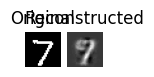

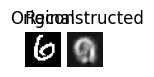

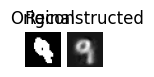

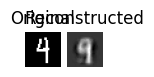

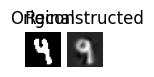

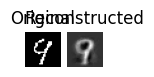

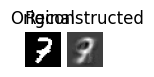

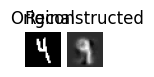

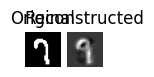

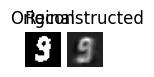

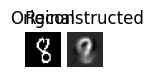

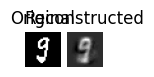

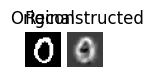

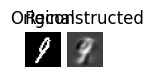

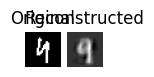

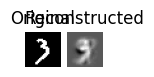

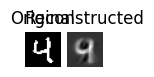

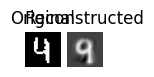

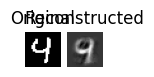

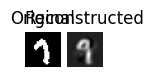

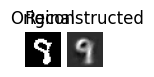

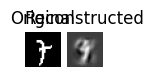

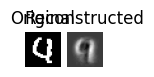

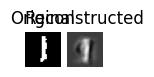

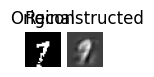

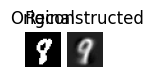

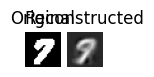

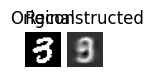

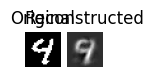

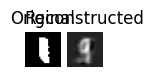

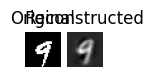

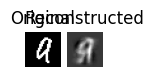

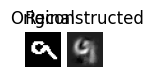

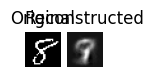

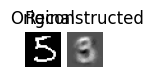

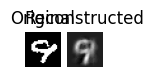

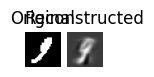

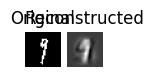

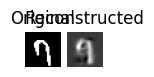

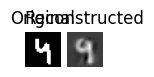

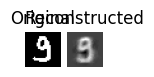

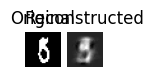

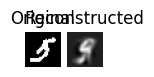

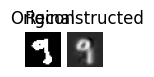

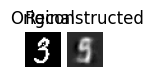

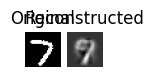

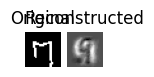

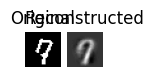

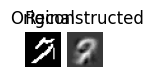

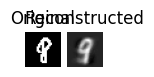

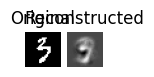

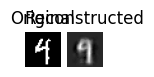

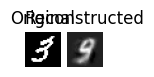

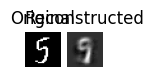

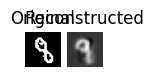

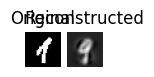

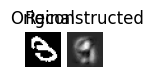

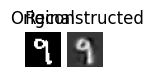

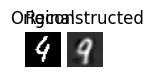

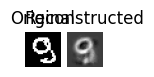

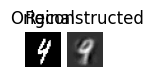

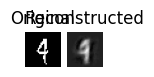

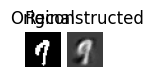

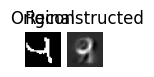

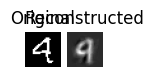

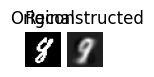

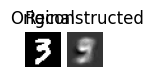

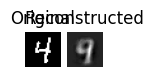

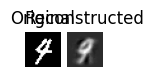

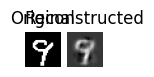

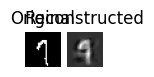

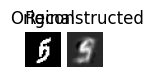

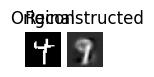

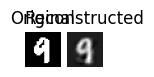

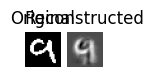

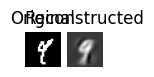

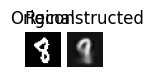

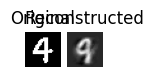

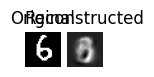

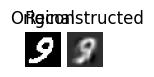

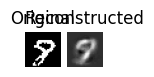

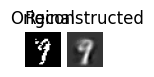

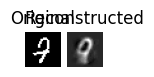

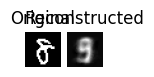

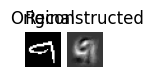

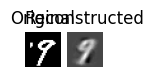

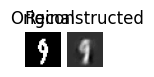

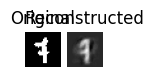

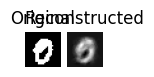

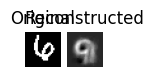

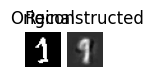

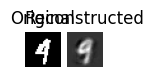

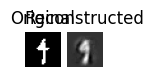

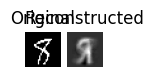

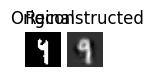

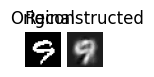

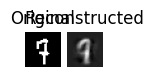

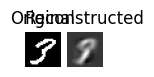

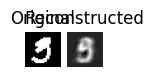

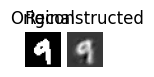

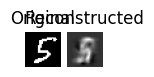

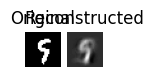

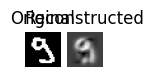

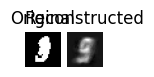

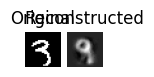

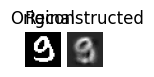

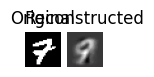

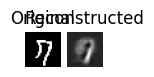

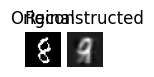

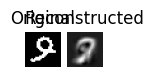

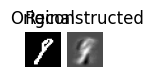

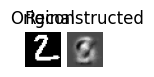

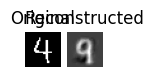

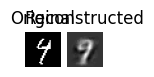

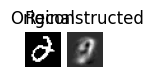

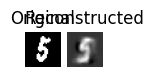

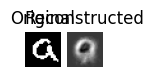

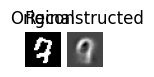

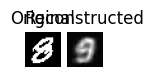

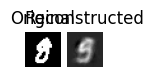

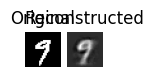

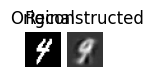

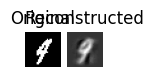

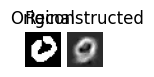

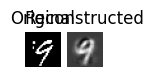

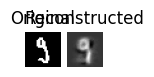

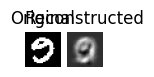

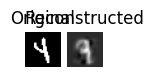

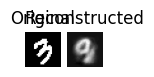

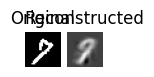

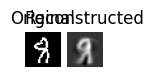

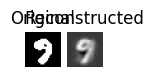

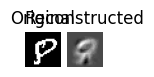

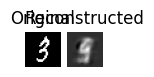

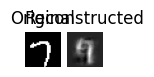

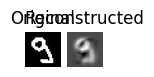

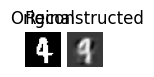

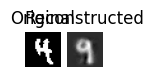

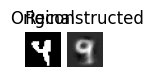

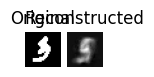

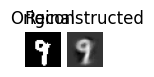

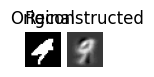

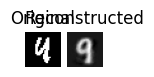

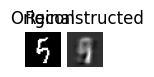

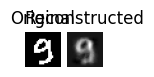

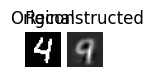

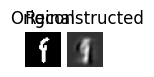

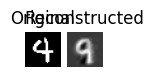

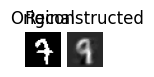

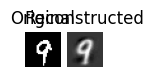

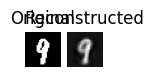

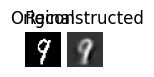

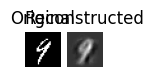

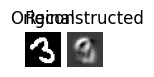

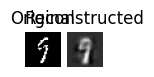

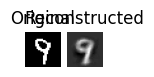

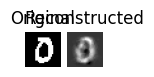

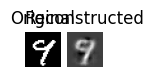

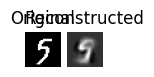

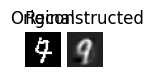

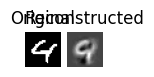

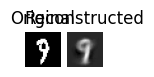

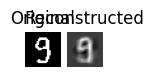

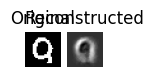

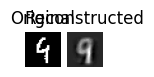

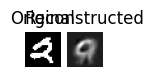

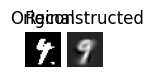

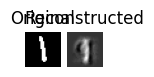

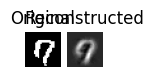

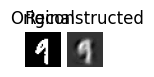

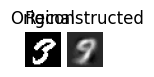

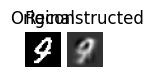

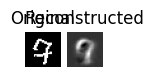

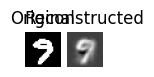

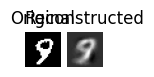

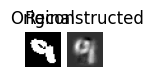

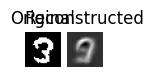

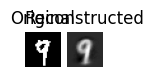

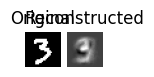

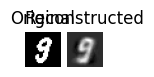

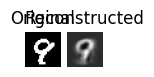

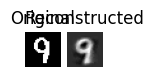

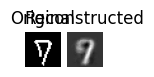

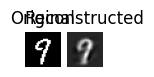

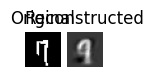

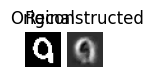

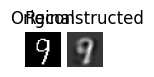

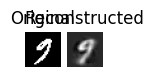

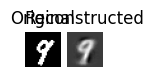

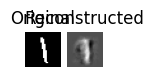

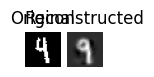

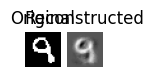

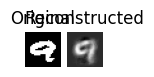

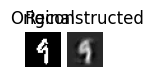

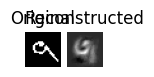

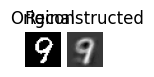

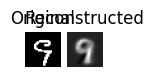

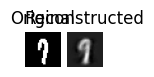

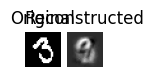

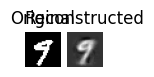

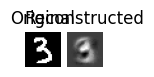

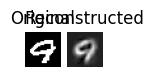

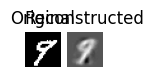

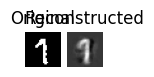

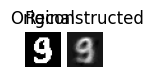

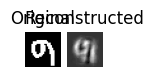

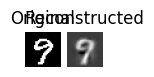

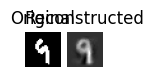

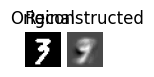

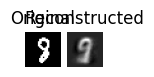

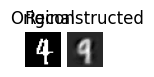

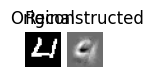

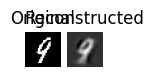

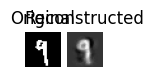

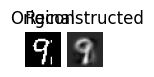

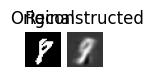

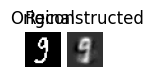

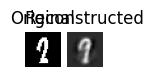

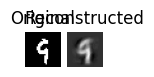

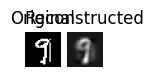

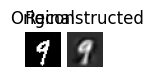

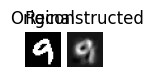

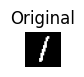

In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, color

# Load images and convert to numpy array
image_folder = './'
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')])

images = []
for file in image_files:
    img = io.imread(os.path.join(image_folder, file))
    img_gray = color.rgb2gray(img[:, :, :3])
    images.append(img_gray.flatten())

images = np.array(images)

# Perform PCA analysis
num_components = 10
pca = PCA(n_components=num_components)
pca.fit(images)

# Transform images using the top principal components
transformed_images = pca.transform(images)
reconstructed_images = pca.inverse_transform(transformed_images)

# Reshape reconstructed images to original shape
reconstructed_images = reconstructed_images.reshape(-1, img_gray.shape[0], img_gray.shape[1])

# Display original and reconstructed images
for i in range(len(image_files)):
    plt.figure(figsize=(1, 1))
    plt.axis('off')

    plt.subplot(1, 2, 1)
    plt.imshow(images[i].reshape(img_gray.shape[0], img_gray.shape[1]), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')
    plt.show()


In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, color

# Load images and convert to numpy array
image_folder = './'
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')])

images = []
for file in image_files:
    img = io.imread(os.path.join(image_folder, file))
    img_gray = color.rgb2gray(img[:, :, :3])
    images.append(img_gray.flatten())

images = np.array(images)

# Perform PCA analysis
num_components = 2
pca = PCA(n_components=num_components)
pca.fit(images)

# Transform images using the top principal components
transformed_images = pca.transform(images)
reconstructed_images = pca.inverse_transform(transformed_images)

# Reshape reconstructed images to original shape
reconstructed_images = reconstructed_images.reshape(-1, img_gray.shape[0], img_gray.shape[1])

# Save reconstructed images
output_folder = './reconstructed_2'
for i, file in enumerate(image_files):
    output_path = os.path.join(output_folder, f'reconstructed_{file}')
    io.imsave(output_path, reconstructed_images[i])

print("Reconstructed images saved.")

Lossy conversion from float64 to uint8. Range [-6.842967917980848e-18, 0.7858909038302472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.000720236204082827, 0.8090464408591735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.1422254210609788, 0.9541394986134974]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.12387362279356307, 0.9420735961386948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.22544843025647582, 0.9477692124042286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-4.592139213392143e-18, 0.7728093483165754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.1270243772750030

Reconstructed images saved.
